In [13]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

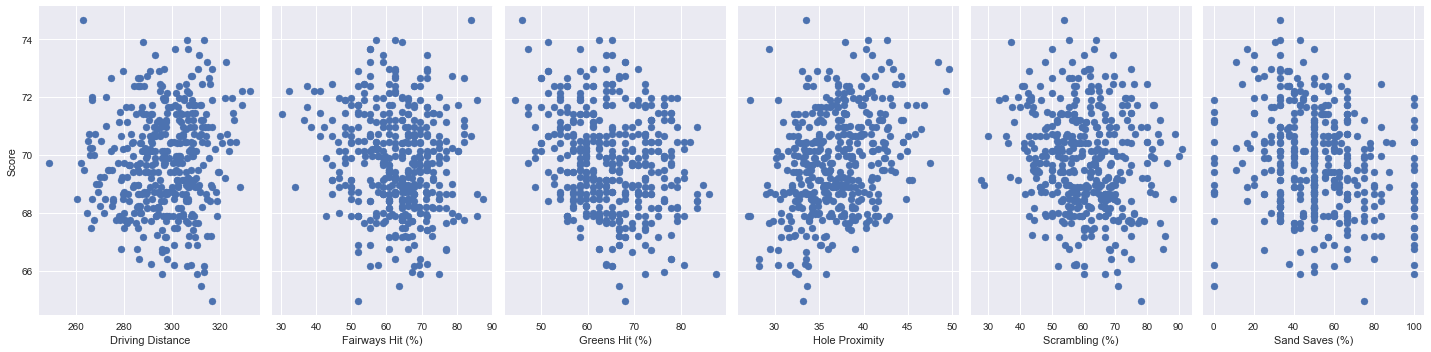

In [14]:
cleanedData = pd.read_csv('../data/cleaned_data/cleaned_subset')

# understanding each feature's relationship with the dependent variable (score)
yAxis = cleanedData['Score']
features = ['Driving Distance', 'Fairways Hit (%)', 'Greens Hit (%)', 'Hole Proximity', 'Scrambling (%)','Sand Saves (%)', 'Putts']

fig, ax = plt.subplots(1, 6, figsize=(20, 5), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(cleanedData[features[i]], yAxis)
    ax[i].set_xlabel(features[i])
        
ax[0].set_ylabel('Score')
fig.tight_layout()
plt.show()  

                  Driving Distance  Fairways Hit (%)  Greens Hit (%)  \
Driving Distance          1.000000         -0.409994        0.256419   
Fairways Hit (%)         -0.409994          1.000000        0.215172   
Greens Hit (%)            0.256419          0.215172        1.000000   
Hole Proximity            0.179869         -0.299171       -0.194700   
Scrambling (%)            0.129106          0.097118        0.272301   
Sand Saves (%)           -0.074188          0.070242        0.086136   
Putts                    -0.016764          0.039094        0.323487   

                  Hole Proximity  Scrambling (%)  Sand Saves (%)     Putts  
Driving Distance        0.179869        0.129106       -0.074188 -0.016764  
Fairways Hit (%)       -0.299171        0.097118        0.070242  0.039094  
Greens Hit (%)         -0.194700        0.272301        0.086136  0.323487  
Hole Proximity          1.000000        0.082099       -0.028865 -0.137540  
Scrambling (%)          0.082099      

<AxesSubplot:>

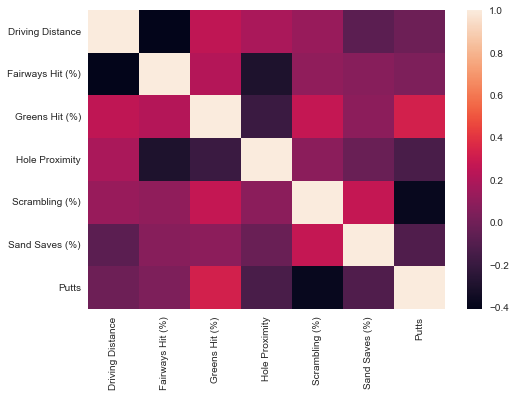

In [15]:
#correlation for independant variables, we want correleations to be -0.5 > x > 0.5 
featureSubset = cleanedData.loc[:, cleanedData.columns != 'Score']

print(featureSubset.corr())
sns.heatmap(featureSubset.corr())

#### Define Linear Function and Cost Function

Linear Function is defined as base value plus a summation of each feature multipied by a calculated weight:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 




$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors

In [28]:
def compute_cost(data, y, w, b) -> float:
    '''
    data (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values, actual y values
    w (ndarray (n,)) : model parameters, weights  
    b (scalar)       : model parameter, base value
    
    '''
    # set number of row and initiate cost at 0
    m, n= data.shape
    cost = 0.0
    
    # calculate summation
    for i in range(m):
        
        # calculate linear function
        linearFn = np.dot(w, data[i]) + b 
        # find the difference between predicted and given value
        cost += (linearFn - y[i]) ** 2

    # account for number of rows (multiple by 2 to account for differiation)
    return cost / (2 * m)

#### 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}
$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [13]:
def compute_gradient(data, y, w, b):
    '''
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
      
    '''
    m, n = data.shape # will return (number of rows, number of features)
    
    #define partial deratives in respect to a weight or base
    pj_pw = np.zeros((n,))
    pj_pb = 0.0
    
    #summation
    for i in range(m):
        # compute the error (linFun - y)
        err = (np.dot(w, data[i]) + b) - y[i]
        
        # compute the new weight partial derative 
        for j in range(n):
            pj_pw[j] =+ err * data[i][j]
        
        pj_pb =+ err
    
    return (pj_pw / m), (pj_pb / m)
    

In [17]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    cost_history = []
    
    w = w_in.copy()  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        pj_pw,pj_pb = compute_gradient(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * pj_pw               ##None
        b = b - alpha * pj_pb               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost_history.append( compute_cost(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}   ")
        
    return w, b, cost_history #return final w,b and J history for graphing

In [41]:
# assign some inital b and w values
# I will also need to divide the data set into a 80/20 training/testing in the future
train, test = train_test_split(subset, test_size=0.2)

# subsetDf = train.loc[:, aggratedData.columns != 'Score']
x_train = train.loc[:, train.columns != 'Score'].to_numpy()
y_train = train['Score'].to_numpy()

print(f'X: {x_train.shape}, Y: {y_train.shape}')

b_init = 5
w_init = np.array([1,1,1,1,1,1,1])

alpha = 9e-3

w_computed, b_computed, history = gradient_descent(x_train, y_train, w_init, b_init, alpha, 100)

print(f"weight: {w_computed}, b: {b_computed}")

X: (338, 7), Y: (338,)
Iteration    0: Cost 135339.37   
Iteration  100: Cost   495.46   
Iteration  200: Cost   318.44   
Iteration  300: Cost   318.03   
Iteration  400: Cost   318.02   
Iteration  500: Cost   318.02   
Iteration  600: Cost   318.02   
Iteration  700: Cost   318.02   
Iteration  800: Cost   318.02   
Iteration  900: Cost   318.02   
weight: [-0.52926095  0.7328033   0.6743961   0.79425305  0.72068293  0.6882622
  0.85036586], b: 4.995012195197056


In [ ]:
#graph the cost vs iteration

In [49]:
score = np.dot(x_train[10], w_computed) + b_computed
print(score)
print(x_train[10])

105.43146873372362
[278.8         69.64        79.17        35.08333333  66.67
  60.          31.        ]


Now I want to try to optimize the model with feature engineering and scaling.

In [ ]:
#since driving distance, hole proximity and putts are not percentages, lets scale the date to increase gradient decent performance
#apply z-score averaging to scale data
def scaling_helper(df: pd.DataFrame):
    for i in df.columns:
        stdDev = df[i].std()
        mean = df[i].mean()
        
        df[i] = df[i].apply(lambda x: (x - mean)/stdDev)

scaling_helper(featureSubset)

Data Scaling with contour plots to show the change (from skinny to more circular)
- take the original verision and divide by the maxmium (1)
- mean normalization, find the mean then subtract the mean from any value and divide it by the range of possibilities
- z-score, use the std.dev and mean of each feature, (value - mean) / std.dev

*aim for all feature to range between -1 to 1, or 0<x<3 

Look into gradiant decent to mimize cost function (the amount of errors that exist in the model, for linear regression this can be the mean square error) this is limited to only find the local minima, and work on completly differentiable functions (non-peicewise), in linear regression that the function is a convex function

Learning rate implications is too small, it will take too long, too large it will overshoot the minima (fail to converge/diverge)

batch gradient descent -> each step of gradient descent looks at all training examples instead of a subset

https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent#:~:text=Gradient%20descent%20is%20an%20algorithm,like%20we've%20seen%20before.

Look into m



talk about vectorization with numpy arrays (dot product) np.dot()

//PLOTS

- after each iteration of gradiate descent I should plot the values (value vs # of iterations) LEARNING CURVE
  - try with a 3x multiplier on the learning rate (alpha)
  - try with maybe 200 iterations
- automatic convergence test (use a check with an epsilion, very small value 10^-3) after each iteration check if the change is less than the epsilion